In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [2]:
train = fetch_20newsgroups(subset='train')

In [8]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [12]:
print([len(train[key]) for key in train.keys()])

[11314, 11314, 20, 11314, 9535]


In [16]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
train['filenames'][0:10]

array(['C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38242',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60880',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.guns\\54525',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58080',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60249',
       'C:\\Users\\forresthooton\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.os.ms-win

In [19]:
train['data'][0:10]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [54]:
from collections import Counter

def count_plotter(terms, top_n, title, ax=None):
    counter = Counter(terms)

    counter = dict(counter.most_common(top_n))

    terms = counter.keys()
    term_counts = list(counter.values())

    # Plot histogram using matplotlib bar().
    indexes = np.arange(len(terms))

    # Horizontal bar graph

    plt.rcdefaults()
    if ax is None:
        fig, ax = plt.subplots()

    ax.barh(indexes, term_counts)
    ax.set_yticks(indexes)
    ax.set_yticklabels(terms)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title(title)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    for i, v in enumerate(term_counts):
        ax.text(v + 1, i + .25, str(v), color='dodgerblue', fontweight='bold')

    #return ax

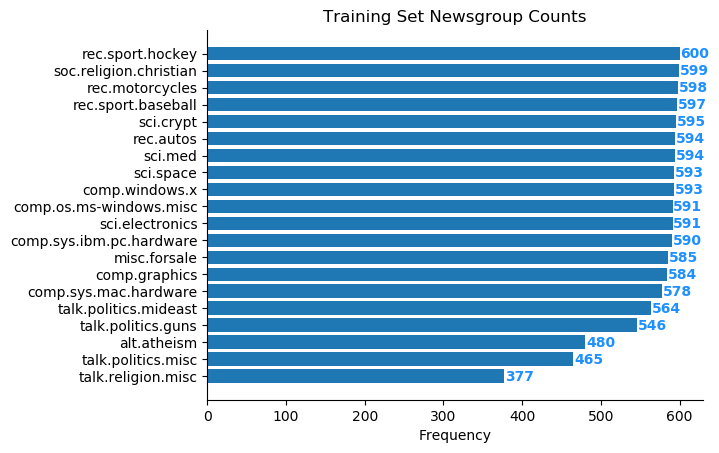

In [47]:
doc_keys = pd.DataFrame(train.target_names, columns=['label']).reset_index()
classifications = pd.DataFrame(train.target, columns=['index'])

classifications = classifications.merge(doc_keys, how='left')

count_plotter(classifications.label.tolist(), 25, 'Training Set Newsgroup Counts')

In [45]:
test = fetch_20newsgroups(subset='test')

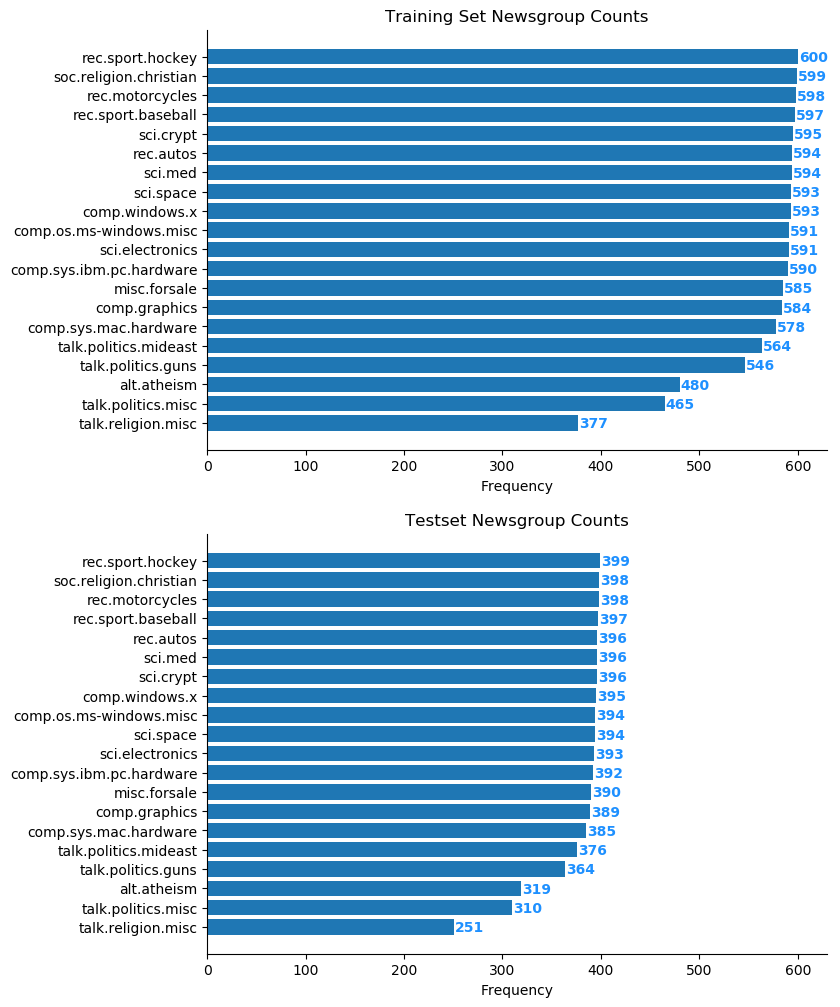

In [62]:
doc_keys = pd.DataFrame(test.target_names, columns=['label']).reset_index()
train_class = pd.DataFrame(train.target, columns=['index'])
test_class = pd.DataFrame(test.target, columns=['index'])

# Append classifications by key
train_class = train_class.merge(doc_keys, how='left')
test_class = test_class.merge(doc_keys, how='left')

_, axs = plt.subplots(2,1, figsize = (8,12), sharex=True)

count_plotter(train_class.label.tolist(), 25, 'Training Set Newsgroup Counts', ax=axs[0])
count_plotter(test_class.label.tolist(), 25, 'Testset Newsgroup Counts', ax=axs[1])

The train and test data do not have drastically different distributions, so shouldn't have to worry about class imbalance.